# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

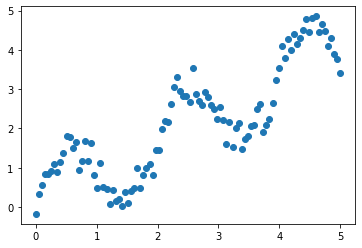

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5663447638247452


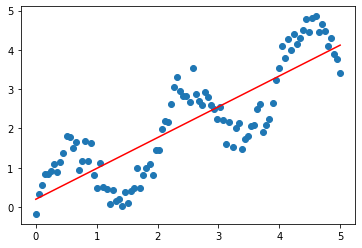

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

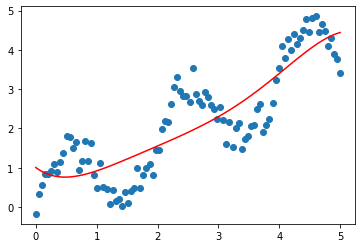

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.15498234  1.669225   -0.74647961  0.15939456 -0.01242618]
interception:  1.004628198426842


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.0046282 , 0.95045842, 0.90424162, 0.86543753, 0.83352979,
       0.80802545, 0.78845449, 0.77436935, 0.76534439, 0.76097545,
       0.76087934, 0.76469334, 0.77207473, 0.78270028, 0.79626577,
       0.81248551, 0.83109185, 0.85183464, 0.87448082, 0.89881387,
       0.92463334, 0.95175438, 0.9800072 , 1.00923664, 1.03930162,
       1.0700747 , 1.10144157, 1.13330056, 1.16556212, 1.19814841,
       1.23099273, 1.26403906, 1.29724158, 1.33056417, 1.3639799 ,
       1.39747058, 1.43102626, 1.4646447 , 1.49833094, 1.53209675,
       1.5659602 , 1.59994511, 1.63408062, 1.66840065, 1.70294344,
       1.73775105, 1.77286885, 1.80834508, 1.84423032, 1.88057699,
       1.91743892, 1.95487077, 1.99292764, 2.0316645 , 2.07113573,
       2.11139465, 2.15249299, 2.19448043, 2.23740409, 2.28130807,
       2.32623292, 2.37221518, 2.41928689, 2.46747506, 2.51680123,
       2.56728098, 2.61892338, 2.67173056, 2.72569721, 2.78081006,
       2.83704742, 2.89437869, 2.95276384, 3.01215296, 3.07248

In [15]:
regr_poly.predict(X_poly)

array([1.0046282 , 0.95045842, 0.90424162, 0.86543753, 0.83352979,
       0.80802545, 0.78845449, 0.77436935, 0.76534439, 0.76097545,
       0.76087934, 0.76469334, 0.77207473, 0.78270028, 0.79626577,
       0.81248551, 0.83109185, 0.85183464, 0.87448082, 0.89881387,
       0.92463334, 0.95175438, 0.9800072 , 1.00923664, 1.03930162,
       1.0700747 , 1.10144157, 1.13330056, 1.16556212, 1.19814841,
       1.23099273, 1.26403906, 1.29724158, 1.33056417, 1.3639799 ,
       1.39747058, 1.43102626, 1.4646447 , 1.49833094, 1.53209675,
       1.5659602 , 1.59994511, 1.63408062, 1.66840065, 1.70294344,
       1.73775105, 1.77286885, 1.80834508, 1.84423032, 1.88057699,
       1.91743892, 1.95487077, 1.99292764, 2.0316645 , 2.07113573,
       2.11139465, 2.15249299, 2.19448043, 2.23740409, 2.28130807,
       2.32623292, 2.37221518, 2.41928689, 2.46747506, 2.51680123,
       2.56728098, 2.61892338, 2.67173056, 2.72569721, 2.78081006,
       2.83704742, 2.89437869, 2.95276384, 3.01215296, 3.07248

In [16]:
mse = np.sum((regr_poly.predict(X_poly)-y)**2) / len(y)
print(mse)

0.5023641918070206


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

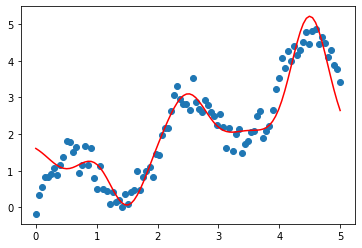

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72748757 -1.72807782  1.31456988  0.29104643  3.42284736]
interception:  1.7908975152780897


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

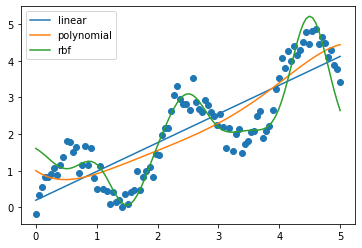

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5663447638247452


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5023641918070206


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.21778957449796807
